In [20]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import json
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
DATASET_PATH = "data.json"

In [23]:
def load_data(dataset_path):
    
    with open(dataset_path) as fp:
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y    

In [24]:
def prepare_datasets(test_size, validation_size, dataset_path):
    
    #load data
    X, y = load_data(dataset_path=dataset_path)
    
    # create train and test
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size)
    
    # create validation split
    X_train, X_validation, y_train, y_validation =train_test_split(X_train, y_train, test_size=test_size)
    
    # TF expects a 3D array for each -> (130, 13, 1) for MFCCs with last D as channel
    X_train = X_train[..., np.newaxis] # now 4d array --> (num samples, 130, 13, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [25]:
# create train, validation, and test sets
(X_train, X_validation, X_test, 
     y_train, y_validation, y_test) = prepare_datasets(test_size=0.25
                                                       , validation_size = 0.2, 
                                                      dataset_path= DATASET_PATH)

In [26]:
def build_model(input_shape):
    # create model
    model = keras.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",
                                 input_shape= input_shape))
    model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # 2nd conv layer
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",
                                 input_shape= input_shape))
    model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # 3rd conv layer
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation="relu",
                                 input_shape= input_shape))
    model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # flatten the output and feed to dense output layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units= 64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))
    
    # dense output layer
    model.add(keras.layers.Dense(units=10, activation="softmax"))
    
    return model

In [27]:
# plot history
def plot_history(history):
    fig, axs = plt.subplots(2)
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train_accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # create errot subplot
    axs[1].plot(history.history["loss"], label="train_error")
    axs[1].plot(history.history["val_loss"], label="test_error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

In [28]:
# build the CNN net

In [29]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])  
model = build_model(input_shape)

In [30]:
# compile the CNN 

In [31]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
             loss= "sparse_categorical_crossentropy",
             metrics="accuracy")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 64, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [32]:
# train the CNN\
history = model.fit(x= X_train, y= y_train, validation_data=[X_validation, y_validation], 
         batch_size = 32, 
         epochs = 30)

Epoch 1/30
176/176 [==============================] - 7s 38ms/step - loss: 2.3968 - accuracy: 0.2423 - val_loss: 1.8770 - val_accuracy: 0.3637
Epoch 2/30
176/176 [==============================] - 6s 36ms/step - loss: 1.8362 - accuracy: 0.3671 - val_loss: 1.5653 - val_accuracy: 0.4384
Epoch 3/30
176/176 [==============================] - 6s 35ms/step - loss: 1.6168 - accuracy: 0.4262 - val_loss: 1.3941 - val_accuracy: 0.5024
Epoch 4/30
176/176 [==============================] - 6s 36ms/step - loss: 1.4653 - accuracy: 0.4747 - val_loss: 1.3155 - val_accuracy: 0.5312
Epoch 5/30
176/176 [==============================] - 7s 38ms/step - loss: 1.4165 - accuracy: 0.4959 - val_loss: 1.2671 - val_accuracy: 0.5451
Epoch 6/30
176/176 [==============================] - 7s 38ms/step - loss: 1.3351 - accuracy: 0.5137 - val_loss: 1.2262 - val_accuracy: 0.5541
Epoch 7/30
176/176 [==============================] - 6s 36ms/step - loss: 1.2981 - accuracy: 0.5342 - val_loss: 1.1825 - val_accuracy: 0.5771

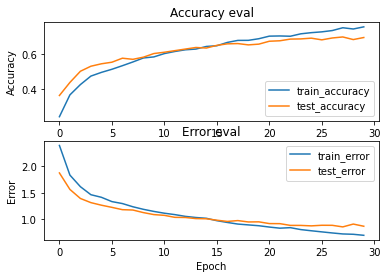

In [40]:
# plot training
plot_history(history)

In [36]:
# evaluate the CNN on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is : {test_accuracy}")

79/79 [==============================] - 1s 9ms/step - loss: 0.8820 - accuracy: 0.6983
Accuracy on test set is : 0.6982793211936951


In [43]:
# make predictions on a sample

def predict(model, X, y):
    X = X[np.newaxis, ...]
    
    prediction = model.predict(X) # X , model expect 4 dims, with first dim as num_samples (1,130,13,1)
    # prediction = [[0.1, 0.2, ...]]
    
    #extract index with max value
    predicted_index = np.argmax(prediction, axis=1) #14
    
    print(f"The expected index is {y} and predicted index is {predicted_index}")

In [47]:
X = X_test[1060]
y = y_test[1060]

In [48]:
predict(model, X, y)

The expected index is 7 and predicted index is [7]


In [ ]:
#